Acurácia: 1.0


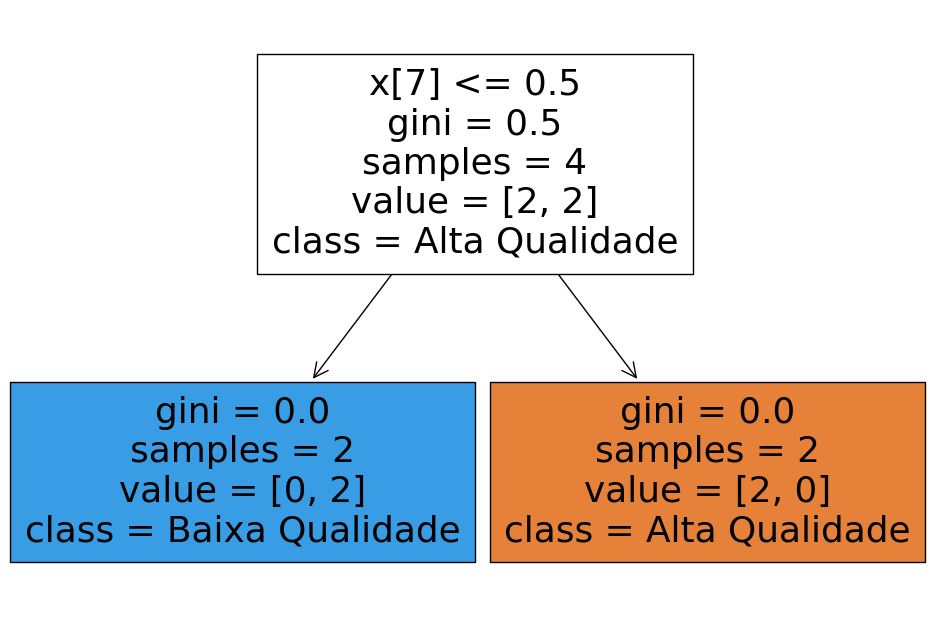

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Dados de treinamento
Prec_Montagem = np.array(['Alta', 'Média', 'Alta', 'Média', 'Baixa', 'Baixa'])
Velocidade_Produ = np.array(['Média', 'Baixa', 'Alta', 'Alta', 'Baixa', 'Média'])
Taxa_Retrabalho = np.array(['Baixa', 'Alta', 'Baixa', 'Baixa', 'Alta', 'Alta'])
Qualidade = np.array(['Alta Qualidade', 'Baixa Qualidade', 'Alta Qualidade', 'Alta Qualidade', 'Baixa Qualidade', 'Baixa Qualidade'])

# Organizar os dados em um único array
dados = np.column_stack((Prec_Montagem, Velocidade_Produ, Taxa_Retrabalho))

# Codificar atributos categóricos usando one-hot com handle_unknown='ignore'
colunas_categoricas = [0, 1, 2]  # Índices das colunas categóricas
transformador = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)], remainder='passthrough')
pipeline = Pipeline(steps=[('preprocessamento', transformador),
                           ('modelo', DecisionTreeClassifier(random_state=42))])

# Definir variáveis dependentes e independentes
X = dados
y = Qualidade

# Dividir os dados em conjunto de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
pipeline.fit(X_treinamento, y_treinamento)

# Fazer previsões
previsoes = pipeline.predict(X_teste)

# Avaliar o desempenho do modelo (usando a acurácia como exemplo)
acuracia = accuracy_score(y_teste, previsoes)
print("Acurácia:", acuracia)

# Visualizar a Árvore de Decisão
plt.figure(figsize=(12, 8))
plot_tree(pipeline.named_steps['modelo'], class_names=['Alta Qualidade', 'Baixa Qualidade'], filled=True)
plt.show()
